In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import pygad

In [ ]:
data = pd.read_csv('data.csv')
release_list = data['release'].tolist()
produce_list = data['produce'].tolist()

In [63]:
# inventory_cost = 재고 비용
# max = 생산량 최대값
def	genetic_algorithm(inventory_cost,	max, num_generations=50, num_parents_mating=5, sol_per_pop=10):
  #	fitness	계산
  def	fitness_func(ga_instance, solution, solution_idx):
    fitness	= 0
    inventory	= 0
    for	idx	in range(len(release_list)):
      #	인벤토리에 생산량	추가
      inventory += solution[idx]
      #	출고량이 있을	때 if문	실행
      if release_list[idx] !=0:
        #	출고량보다 같거나	많은 양을 보유하고 있을 때
        if inventory >= release_list[idx]:
          #	출고량만큼 fitness를 더해주고	인벤토리에서 출고량을	제함
          fitness	+= release_list[idx]
          inventory	-= release_list[idx]
        #	출고량보다 적은	양을 보유하고 있을 때
        else:
          #	출고 가능한 양만큼 fitness를 더해주고 출고 못 한 양만큼 fitness를 제함
          fitness	+= inventory
          fitness	-= release_list[idx] - inventory
          #	출고량이 인벤토리	재고보다 많기	때문에 인벤토리를	0으로	할당
          inventory	= 0
      #	fitness에서	인벤토리 재고양	*	재고 비용을	제함
      fitness -= inventory * inventory_cost
    return fitness

  #	Genetic	Algorithm	실행
  #	세대 수 = 50
  # 세대 당	부모 유전체	채택 수 = 5
  # 세대 당	유전체 수	=	10
  # 부모 유전체 선택 방식 = "rank"
  # 변이 확률 = 1%
  # 변이 방식 = "random"
  ga_instance	=	pygad.GA(
    num_generations=num_generations,
    num_parents_mating=num_parents_mating,	
    fitness_func=fitness_func,
    sol_per_pop=sol_per_pop,
    num_genes=len(release_list),
    gene_type=int,
    init_range_low=0,
    init_range_high=max,
    parent_selection_type="rank",
    mutation_percent_genes=1,
    mutation_type="random",
    mutation_by_replacement=True)
  fitness_base = fitness_func(ga_instance, produce_list, 0)
  return ga_instance, fitness_base


c:\ML-Learn\.venv\Lib\site-packages\pygad\visualize\plot.py:120: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  matplt.legend()


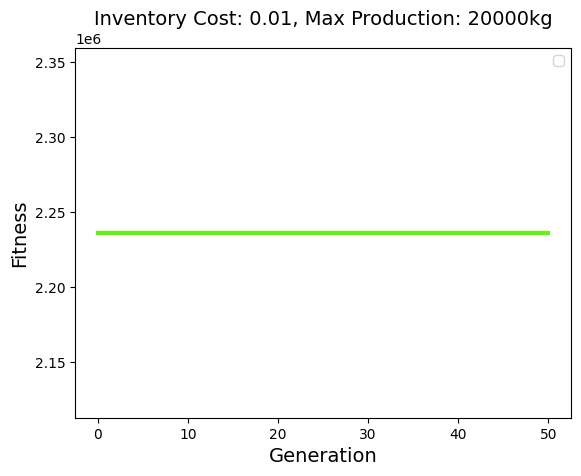

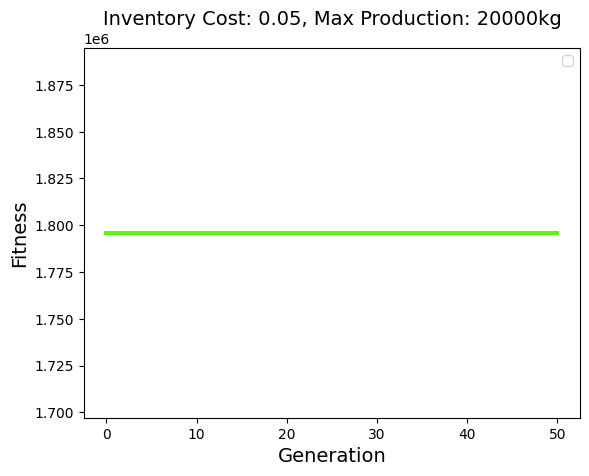

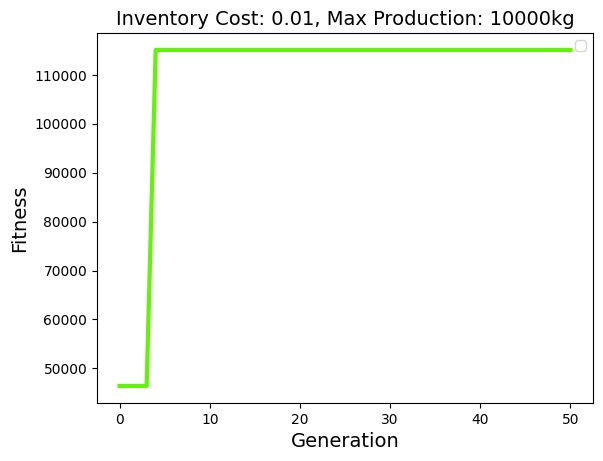

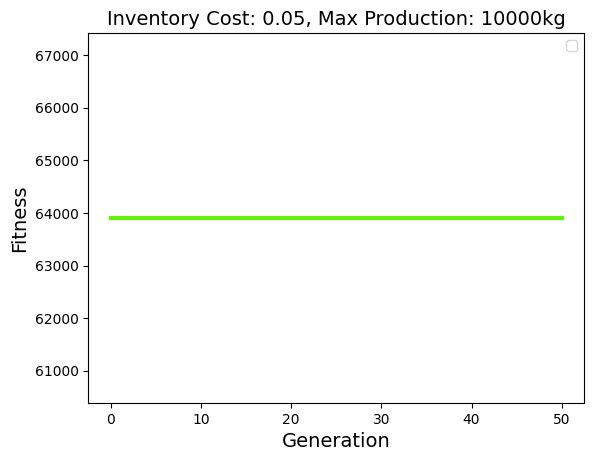

In [64]:
#	재고 비용	=	0.01,	일일 최대	생산량 = 20000kg
ga1, ga1_base	=	genetic_algorithm(0.01,	20000)
#	재고 비용	=	0.05,	일일 최대	생산량 = 20000kg
ga2, ga2_base	=	genetic_algorithm(0.05,	20000)
#	재고 비용	=	0.01,	일일 최대	생산량 = 10000kg
ga3, ga3_base	=	genetic_algorithm(0.01,	10000)
#	재고 비용	=	0.05,	일일 최대	생산량 = 10000kg
ga4, ga4_base	=	genetic_algorithm(0.05,	10000)
ga1.run()
ga2.run()
ga3.run()
ga4.run()
ga1.plot_fitness(title="Inventory Cost: 0.01, Max Production: 20000kg")
ga2.plot_fitness(title="Inventory Cost: 0.05, Max Production: 20000kg")
ga3.plot_fitness(title="Inventory Cost: 0.01, Max Production: 10000kg")
ga4.plot_fitness(title="Inventory Cost: 0.05, Max Production: 10000kg")
plt.show()

In [65]:
ga1_fit = ga1.best_solution()[1]
ga2_fit = ga2.best_solution()[1]
ga3_fit = ga3.best_solution()[1]
ga4_fit = ga4.best_solution()[1]

# 테이블 생성

df = pd.DataFrame({
  'Inventory Cost': [0.01, 0.05, 0.01, 0.05],
  'Max Production': [20000, 20000, 10000, 10000],
  'Base Fitness': [ga1_base, ga2_base, ga3_base, ga4_base],
  'Best Fitness': [ga1_fit, ga2_fit, ga3_fit, ga4_fit],
  'Improvement': [ga1_fit - ga1_base, ga2_fit - ga2_base, ga3_fit - ga3_base, ga4_fit - ga4_base]
})

print(df)

   Inventory Cost  Max Production  Base Fitness  Best Fitness  Improvement
0            0.01           20000     2198137.0    2236222.01     38085.01
1            0.05           20000     1200485.0    1795909.95    595424.95
2            0.01           10000     2198137.0     115097.88  -2083039.12
3            0.05           10000     1200485.0      63904.90  -1136580.10


c:\ML-Learn\.venv\Lib\site-packages\pygad\visualize\plot.py:120: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  matplt.legend()


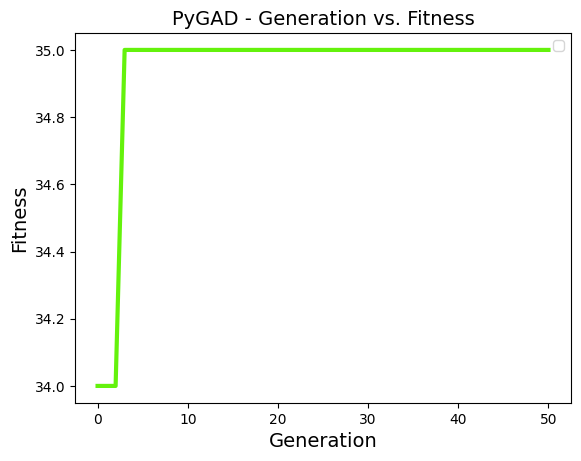

(array([1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1]), np.int64(35), np.int64(0))


In [66]:
def fit(ga_instance, solution, solution_idx):
    # 해의 모든 값을 더하는 fitness 함수
    return sum(solution)

ga_obj = pygad.GA(
  num_generations=50,                  # 세대 수는 50
  num_parents_mating=10,               # 선택되는 부모 수 10
  fitness_func=fit,
  sol_per_pop=50,                      # 해 집단의 크기 50
  num_genes=50,
  gene_type=int,
  init_range_low=0,
  init_range_high=2,                   # [0, 1]의 값
  parent_selection_type="tournament",  # 토너먼트 선택 방식
  mutation_percent_genes=5,            # 돌연변이 비율 5%
  mutation_type="random",
  mutation_by_replacement=True,
  keep_elitism=2                       # 각 세대마다 상위 2개 해를 그대로 유지
)

ga_obj.run()
ga_obj.plot_fitness()
print(ga_obj.best_solution())